In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from qmcpy import *
os.getcwd()

'/Users/terrya/Documents/ProgramData/QMCSoftware/demos'

# Example 1: Dimension 1, Function x

In [2]:
sobolfile = f"../qmcpy/discrete_distribution/digital_net_b2/generating_matrices{os.sep}sobol.dat"

sobolfile2 = f"../qmcpy/discrete_distribution/digital_net_b2/generating_matrices{os.sep}sobol2.dat"

The same example in Matlab takes a wall time of approximately 143.6 seconds. Here there is no need to use parallel processing since there is only 1 dimension and the run time is approximately 34.2s.

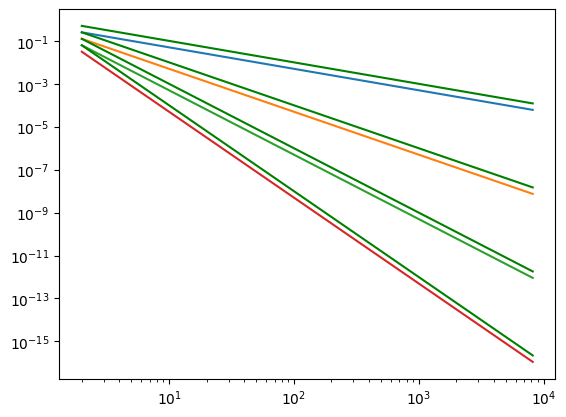

CPU times: user 6.13 s, sys: 1.85 s, total: 7.98 s
Wall time: 35.9 s


In [3]:
%%time
mmax = 13
dmax = 4

plt.figure()

for d in range(1, dmax+1):
    z = np.zeros(mmax)
    for m in range(1, mmax+1):
        sobol = HOSobol(m, 1, d, sobolfile=sobolfile, is_parallel=False)
        x = sobol.generate()
        z[m-1] = np.abs((2**(-m)*np.sum(x)) -1/2)

    plt.loglog(2**np.arange(1, mmax+1), z)

for d in range(1, dmax+1):
    plt.loglog(2.**np.arange(1, mmax+1), 2.**(-d*np.arange(1, mmax+1)),  'green')

plt.show()

# Example 2: Dimension 1, Function $\sin 2\pi x$

The same example in Matlab takes a wall time of approximately 35.7 seconds. The run time here is about 12.5s.

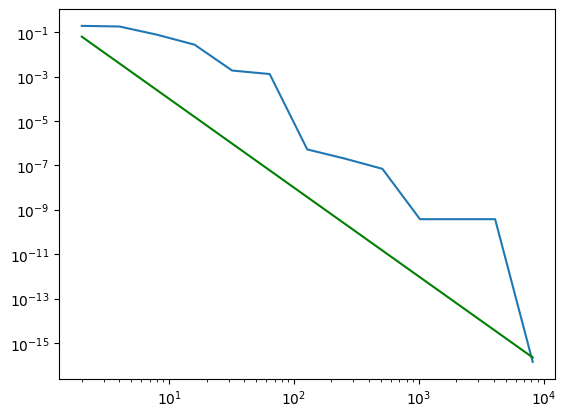

CPU times: user 1.89 s, sys: 79.6 ms, total: 1.97 s
Wall time: 11 s


In [4]:
%%time
mmin = 1
mmax = 13
d = 4  # 1, 2, 3, or 4
dmin = d
dmax = d

for d in range(dmin, dmax + 1):
    z = np.zeros(mmax)
    for m in range(mmin, mmax + 1):
        sobol = HOSobol(m, 1, d, sobolfile=sobolfile, is_parallel=False)
        x = sobol.generate()
        z[m-1] = abs(pow(2, -m) * np.sum(np.sin(2 * np.pi * x)))

    plt.loglog(np.power(2, np.arange(mmin, mmax + 1)), z)


for d in range(dmin, dmax + 1):
    plt.loglog(np.power(2.0, np.arange(mmin, mmax + 1)), np.power(2.0, -d * np.arange(mmin, mmax + 1)), 'green')
 
plt.show()


# Example 3: Dimension 1, Function $\frac{5}{2}x^{3/2}$

The same example in Matlab takes a wall time of approximately seconds. Here if we use parallel processing, it is s and otherwise it s.

# Example 4: Dimension 2, Function $5x^{3/2} y$

# Example 5: Dimension 5, Function $32 x_1x_2x_3x_4x_5$

# Example 6

In [5]:
# Generate the Sobol sequence
def plot_sobol(m, s, d):
    sobol = HOSobol(m, s, d, sobolfile=sobolfile)
    X = sobol.generate()
    
    # Plot the first two dimensions
    plt.plot(X[:,0], X[:,1], '.')
    plt.show()

Matlab takes 16.4 and 27.3 seconds for the following two examples. We need only 3.2s and 11.1s using parallel computing, respectively.

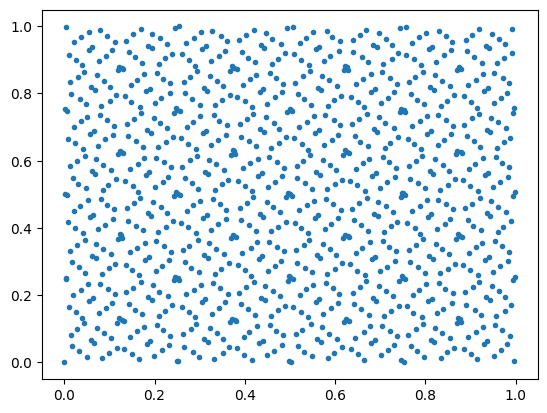

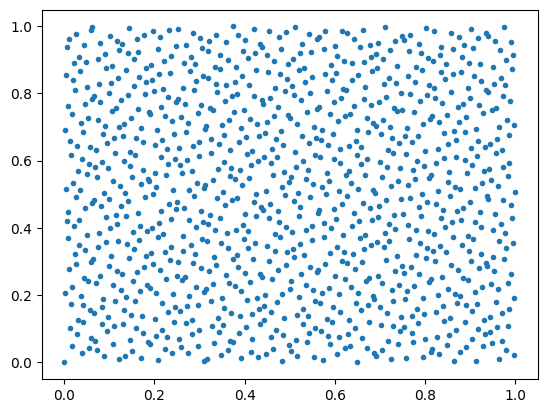

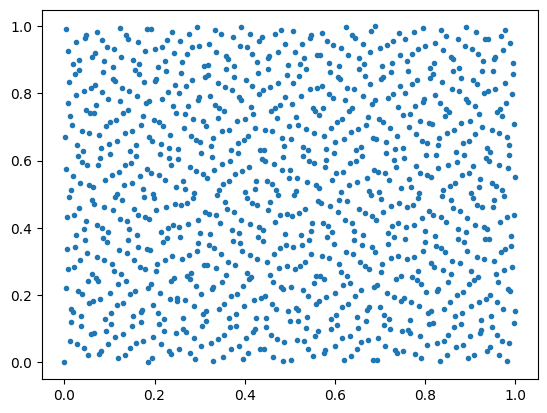

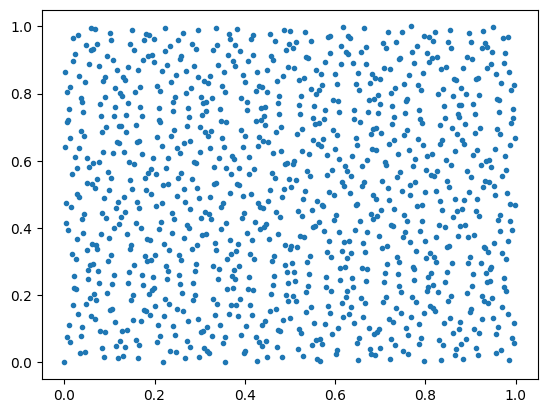

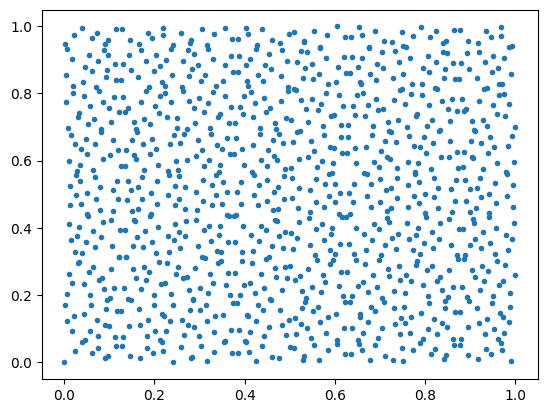

CPU times: user 3.09 s, sys: 48.8 ms, total: 3.14 s
Wall time: 3.16 s


In [6]:
%%time
for d in range(1, 6):
    plot_sobol(m=10, s=2, d=d)

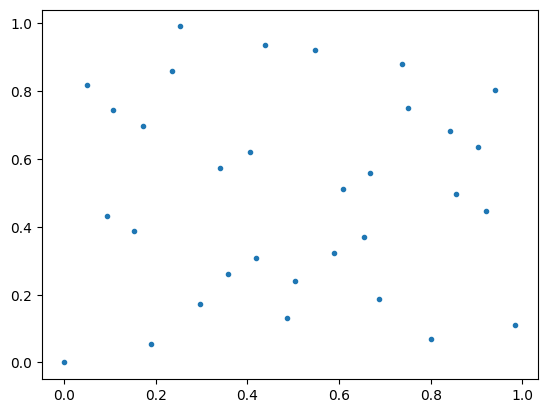

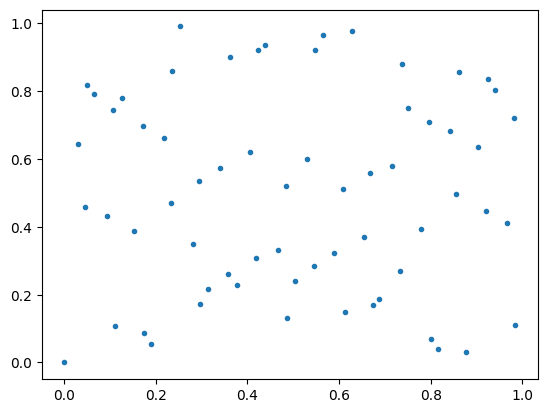

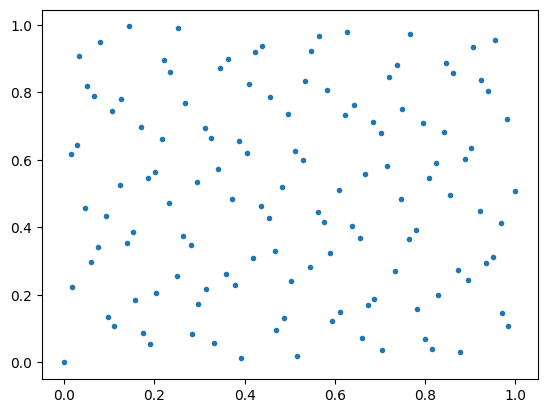

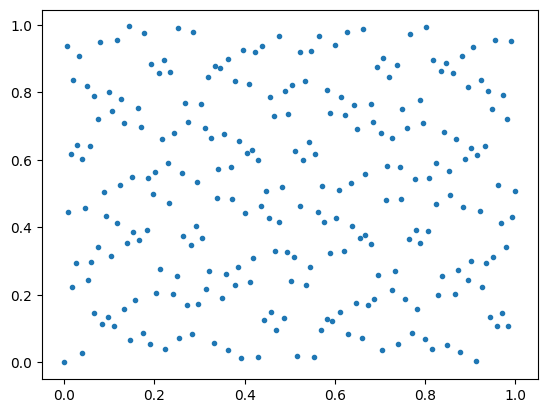

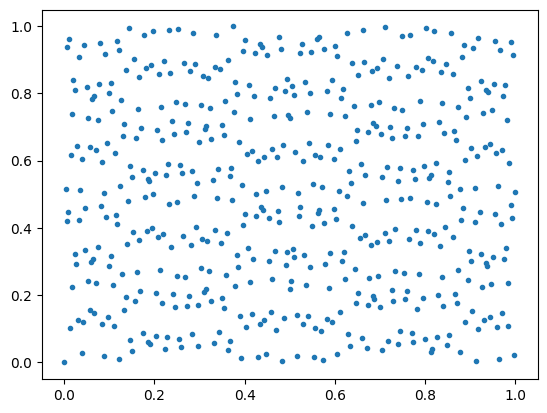

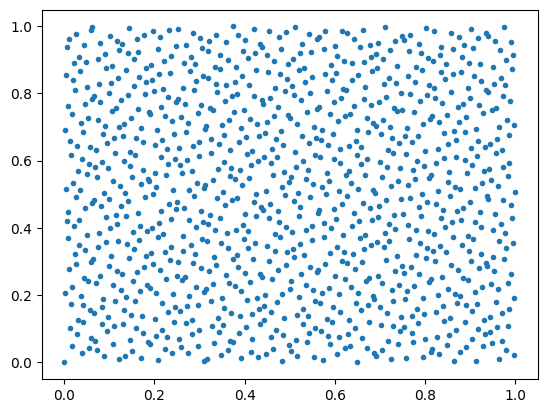

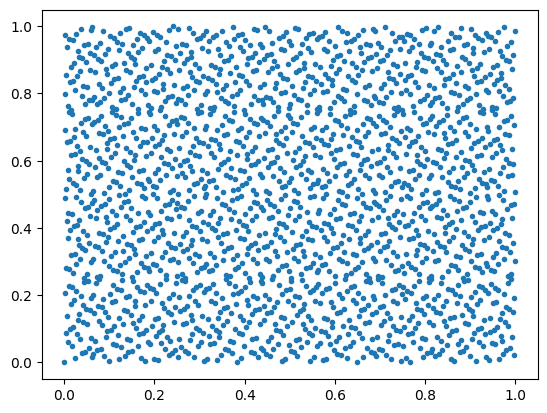

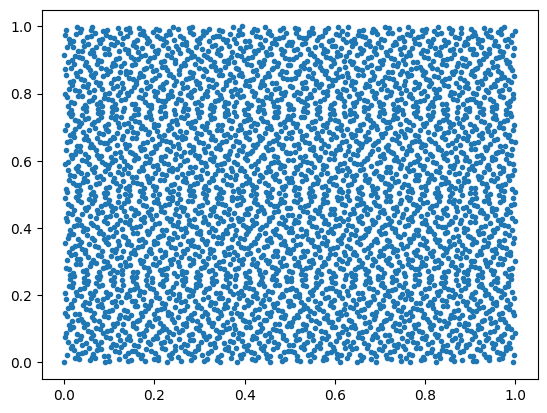

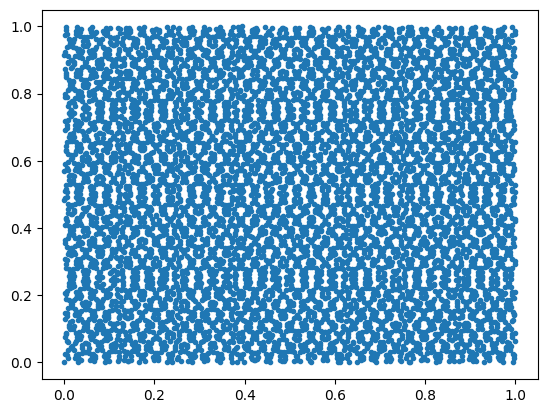

CPU times: user 5.83 s, sys: 114 ms, total: 5.94 s
Wall time: 11.1 s


In [7]:
%%time
for m in range(5, 14):
    plot_sobol(m=m, s=2, d=2)